# Diabetes Dataset - Random Forest

### 0. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import resample

import pickle

### 1. Data visualization

In [2]:
df = pd.read_csv("./data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


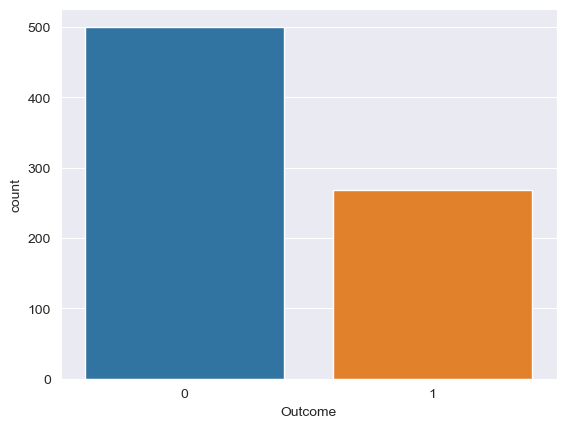

In [6]:
sns.countplot(x=df['Outcome'])
plt.show()

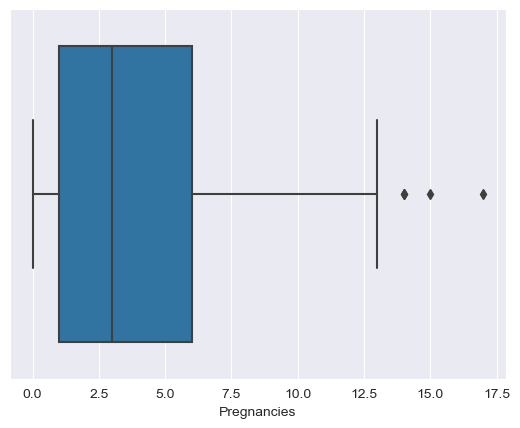

In [7]:
sns.boxplot(x=df['Pregnancies'])
plt.show()

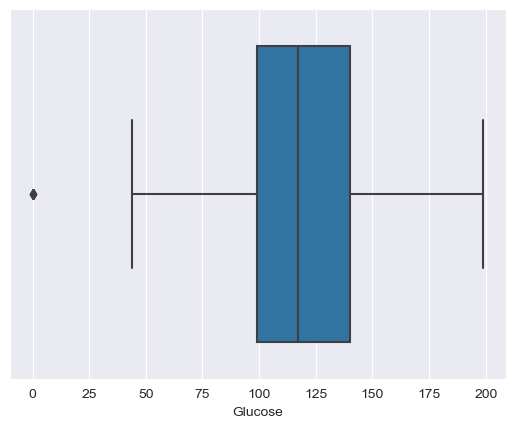

In [8]:
sns.boxplot(x=df['Glucose'])
plt.show()

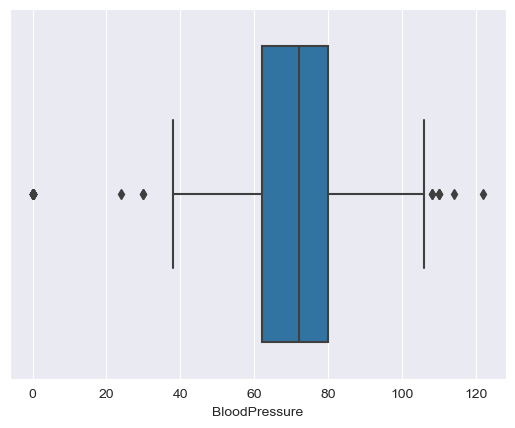

In [9]:
sns.boxplot(x=df['BloodPressure'])
plt.show()

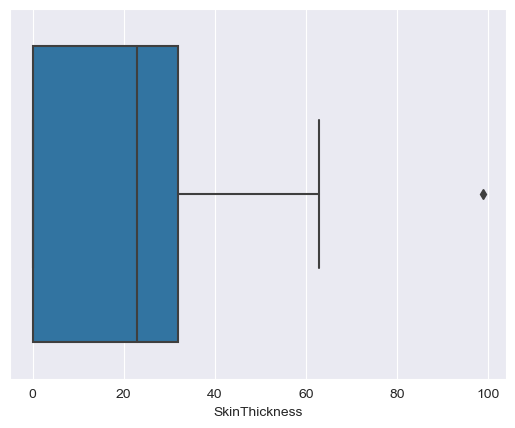

In [10]:
sns.boxplot(x=df['SkinThickness'])
plt.show()

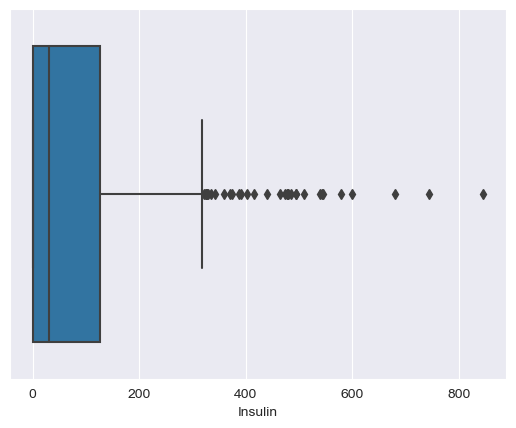

In [11]:
sns.boxplot(x=df['Insulin'])
plt.show()

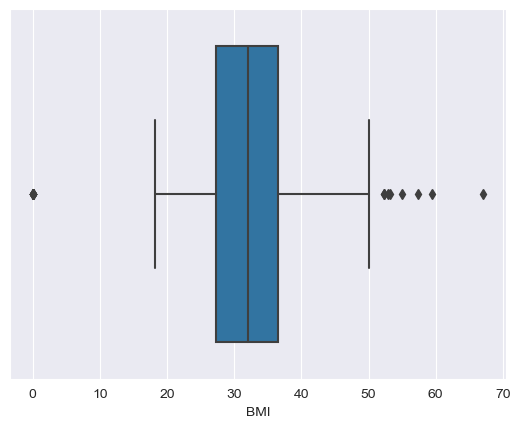

In [12]:
sns.boxplot(x=df['BMI'])
plt.show()

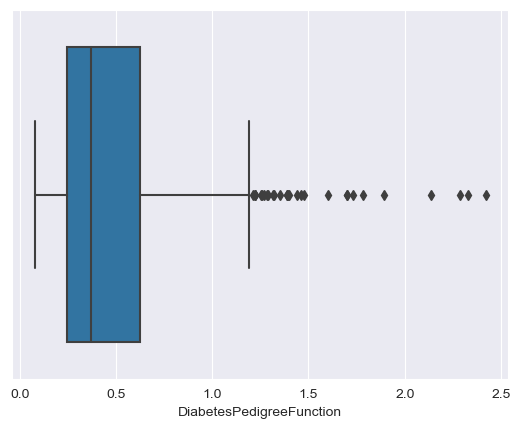

In [13]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

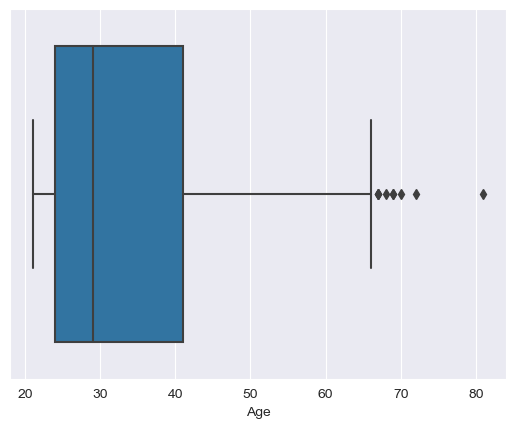

In [14]:
sns.boxplot(x=df['Age'])
plt.show()

### 2. Data preparation

In [15]:
df.drop(df[df['BloodPressure'] < 39].index, inplace=True)

In [16]:
df.drop(df[df['BMI'] < 10].index, inplace=True)

In [17]:
df_y_0 = df[(df['Outcome']==0)]
df_y_1 = df[(df['Outcome']==1)]
size = len(df_y_0.index)

df_y_1_extended = resample(df_y_1,
                       replace=True,
                       n_samples= size,
                       random_state=42)

df_extended = pd.concat([df_y_1_extended, df_y_0])

In [18]:
y = df_extended['Outcome']
X = df_extended.drop(columns='Outcome')

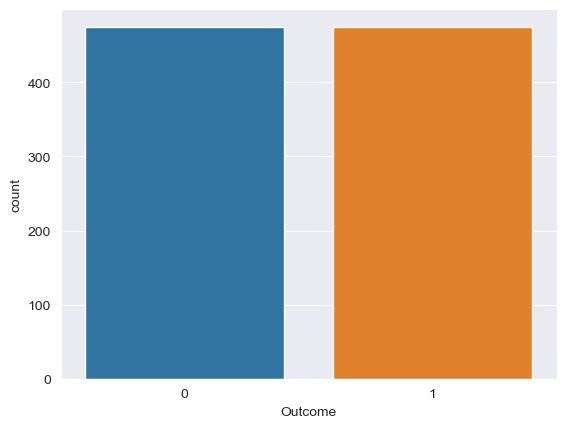

In [19]:
sns.countplot(x=df_extended['Outcome'])
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=100)

### 3. Model

In [21]:
random_forest_clf = RandomForestClassifier(max_depth=8, n_estimators=100, random_state=42)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

### 4. Results

In [22]:
print('Train set accuracy: ' , random_forest_clf.score(X_train, y_train))
print('Test set accuracy: ' , random_forest_clf.score(X_test, y_test))

Train set accuracy:  0.9605263157894737
Test set accuracy:  0.8789473684210526


In [23]:
y_pred = random_forest_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

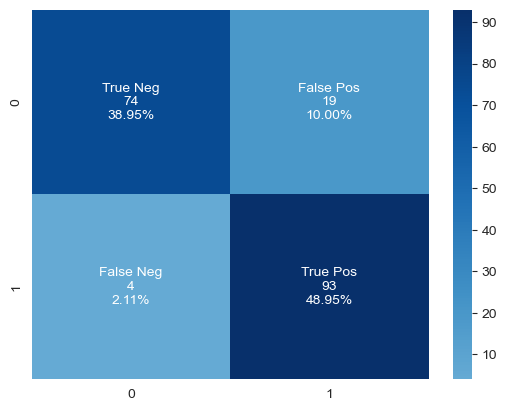

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cf_matrix, center=True, annot=labels, fmt="", cmap='Blues')
plt.show()

In [25]:
prf = precision_recall_fscore_support(y_test, y_pred)
print('Train set precision: ' , prf[0][1])
print('Train set recall: ' , prf[1][1])
print('Train set f1 score: ' , prf[2][1])

Train set precision:  0.8303571428571429
Train set recall:  0.9587628865979382
Train set f1 score:  0.8899521531100478


### 5. Saving the model

**5.1 Saving**

In [26]:
MODEL_PATH = "random_forest_model.pkl"

In [27]:
pickle.dump(random_forest_clf, open(MODEL_PATH, 'wb'))

**5.2 Testing**

In [28]:
model = pickle.load(open(MODEL_PATH,'rb'))

In [29]:
result = model.predict(np.array([6, 148, 72, 35, 0, 33.6, 0.627, 50]).reshape(1, -1))
print(result)

[1]


C:\Users\adamd\anaconda3\envs\tf_2.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
